<a href="https://colab.research.google.com/github/NIIDED/ComputerVSComputer/blob/main/%E8%89%B2%E6%A4%9C%E5%87%BA%EF%BC%88%E3%81%AB%E3%81%84%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

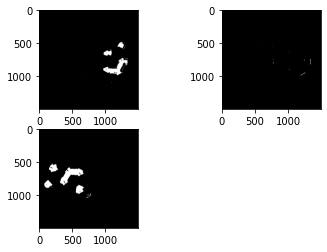

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 画像の読み込み
ac = cv2.imread('/content/9410c0_1c694c69c6274aa78fe54bd4a65bc12e_mv2.webp');

# HSV形式に変換
hsvac = cv2.cvtColor(ac, cv2.COLOR_BGR2HSV)

ac_width, ac_height, ac_col = hsvac.shape

# H,S,Vそれぞれの下限値と上限値
lower_green = np.array([50, 0, 80])
upper_green = np.array([90, 255, 255])

lower_blue = np.array([90, 30, 130])
upper_blue = np.array([105, 255, 255])

lower_orange = np.array([10, 100, 100])
upper_orange = np.array([40, 255, 255])

# 各ピクセルが上限値と下限値の間に入るかどうかで2値化する
ac_mask_green = cv2.inRange(hsvac, lower_green, upper_green)
ac_mask_blue = cv2.inRange(hsvac, lower_blue, upper_blue)
ac_mask_orange = cv2.inRange(hsvac, lower_orange, upper_orange)

# マスキング用のデータ（すべて0で初期化）
ac_mask_green_img = np.zeros((ac_width, ac_height, 3), dtype=np.uint8)
ac_mask_blue_img = np.zeros((ac_width, ac_height, 3), dtype=np.uint8)
ac_mask_orange_img = np.zeros((ac_width, ac_height, 3), dtype=np.uint8)

# BGRすべてで2値化
for i in range(3):
    ac_mask_green_img[:, :, i] = ac_mask_green
for i in range(3):
    ac_mask_blue_img[:, :, i] = ac_mask_blue
for i in range(3):
    ac_mask_orange_img[:, :, i] = ac_mask_orange


# 2値化した画像の表示
plt.subplot(221).imshow(cv2.cvtColor(ac_mask_green_img, cv2.COLOR_BGR2RGB));
plt.subplot(222).imshow(cv2.cvtColor(ac_mask_blue_img, cv2.COLOR_BGR2RGB));
plt.subplot(223).imshow(cv2.cvtColor(ac_mask_orange_img, cv2.COLOR_BGR2RGB));


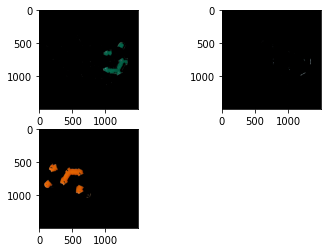

In [18]:
# im2の画像と2値化した画像でマスキング
ac_masked_green = cv2.bitwise_and(ac, ac_mask_green_img)
ac_masked_blue = cv2.bitwise_and(ac, ac_mask_blue_img)
ac_masked_orange = cv2.bitwise_and(ac, ac_mask_orange_img)

# マスキングした画像の表示
plt.subplot(221).imshow(cv2.cvtColor(ac_masked_green, cv2.COLOR_BGR2RGB))
plt.subplot(222).imshow(cv2.cvtColor(ac_masked_blue, cv2.COLOR_BGR2RGB))
plt.subplot(223).imshow(cv2.cvtColor(ac_masked_orange, cv2.COLOR_BGR2RGB))



In [19]:
#色をグレイに
ac_masked_green2gray = cv2.cvtColor(ac_masked_green, cv2.COLOR_BGR2GRAY)
ac_masked_blue2gray = cv2.cvtColor(ac_masked_blue, cv2.COLOR_BGR2GRAY)
ac_masked_orange2gray = cv2.cvtColor(ac_masked_orange, cv2.COLOR_BGR2GRAY)

#binary data に
ret, ac_masked_green2gray = cv2.threshold(ac_masked_green2gray, 0, 255, cv2.THRESH_BINARY)
ret, ac_masked_blue2gray = cv2.threshold(ac_masked_blue2gray, 0, 255, cv2.THRESH_BINARY)
ret, ac_masked_orange2gray = cv2.threshold(ac_masked_orange2gray, 0, 255, cv2.THRESH_BINARY)

In [20]:
greenNumber = cv2.countNonZero(ac_masked_green2gray)
blueNumber = cv2.countNonZero(ac_masked_blue2gray)
orangeNumber = cv2.countNonZero(ac_masked_orange2gray)

In [21]:
#辞書で扱う
colorNumber = {"緑": greenNumber, "青": blueNumber,"橙":orangeNumber}
colorNumber

{'緑': 46238, '青': 1396, '橙': 69869}

In [22]:
colorNumber_list = sorted(colorNumber.items(), key = lambda num : num[1]) 
maxColor =  colorNumber_list.pop()
nextMaxColor = colorNumber_list.pop()

print(maxColor , nextMaxColor)

('橙', 69869) ('緑', 46238)


In [23]:
if nextMaxColor[1] <=  10000 : 
    nextMaxColor = maxColor

print(maxColor , nextMaxColor)

('橙', 69869) ('緑', 46238)
